<a href="https://colab.research.google.com/github/Dhanya-Zac/Airline-passengers-time-series-/blob/main/Airlines_time_series_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The classic Box & Jenkins airline data.  Monthly totals of
     international airline passengers, 1949 to 1960.

In [ ]:
install.packages("astsa")

library(astsa)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



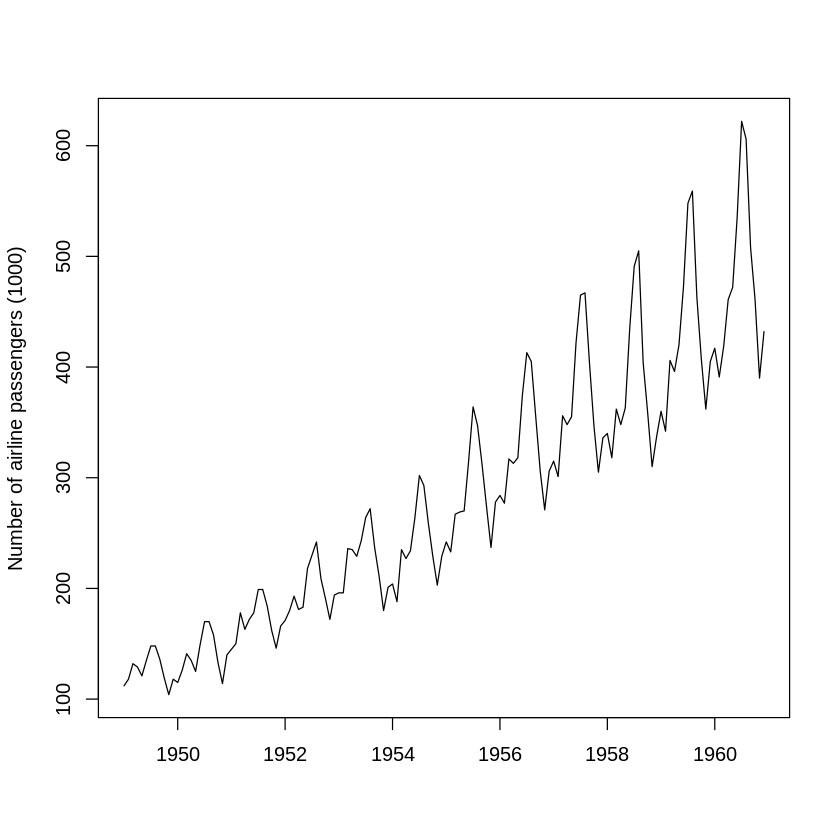

In [ ]:
# Airlines data: The classic Box & Jenkins airline data.
# Monthly totals of international airline passengers, 1949 to 1960.
data("AirPassengers")
?AirPassengers
AP <- AirPassengers
plot(AP, ylab="Number of airline passengers (1000)", xlab="", type="l", pch =20)l

  
A multiplicative decomposition is generally used when the amplitude of the seasonal fluctuations increases or decreases with the level of the trend. This is often seen in time series that grow exponentially over time.

Decomposing a time series helps you better understand its structure by separating it into different components, which can be analyzed individually.
Trend: You can examine whether there’s a steady increase or decrease over time.
Seasonality: You can see regular patterns (such as yearly peaks and troughs).
Residuals: Allows you to evaluate the randomness in the data and identify potential outliers.
Forecasting: Once decomposed, the components can be modeled separately and recombined to make more accurate forecasts. For instance, you can model the trend and seasonality to predict future values.

This command visualizes the decomposed components of the time series. When you run this, it will generate four plots:
Observed: The original time series data.
Trend: The long-term trend extracted from the data.
Seasonal: The seasonal variation that repeats periodically (e.g., annually or quarterly).
Residual: The part of the time series that cannot be explained by the trend or seasonality (the noise or error).

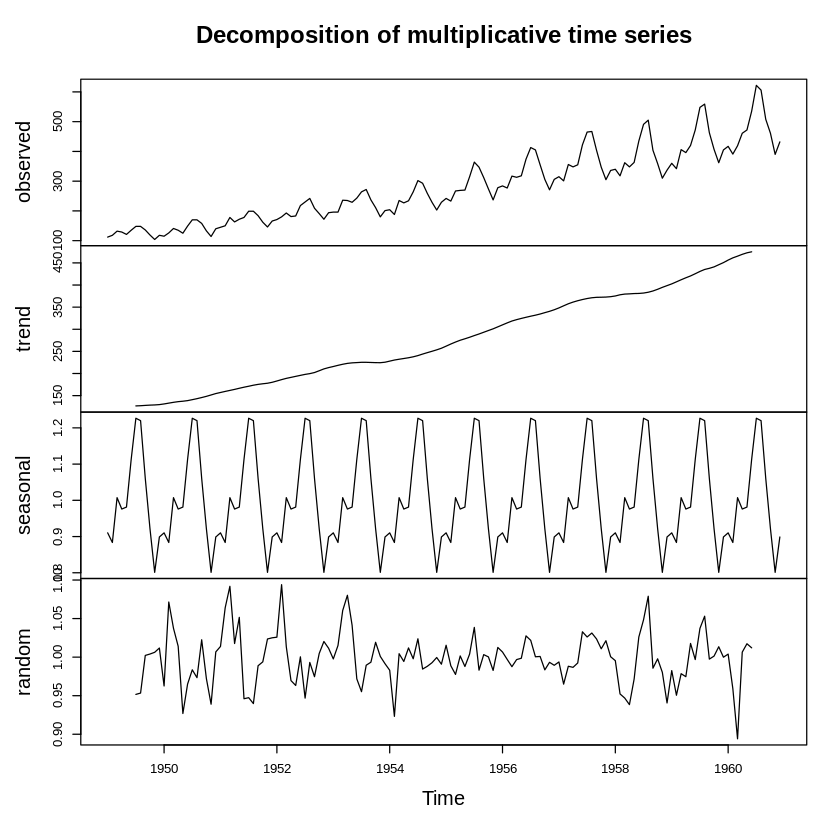

In [ ]:
AP.decompM <- decompose(AP, type = "multiplicative")
plot(AP.decompM)

type = "multiplicative": Indicates that the time series has a multiplicative structure. In a multiplicative model, the observed data at time
𝑡 is expressed as:
𝑌
𝑡
=
𝑇
𝑡
×
𝑆
𝑡
×
𝑅
𝑡

where:𝑌is the observed data,
𝑇
 is the trend component,
𝑆
 is the seasonal component, and
𝑅


​
  is the residual (or error/noise) component.



In [ ]:
install.packages("forecast")
library(forecast)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




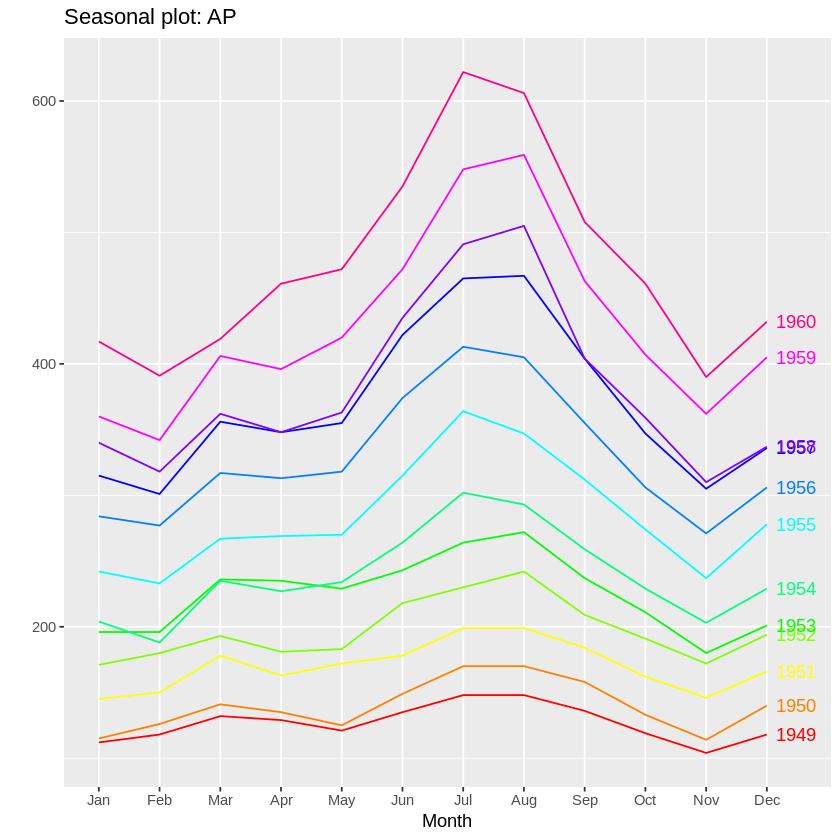

In [ ]:
# seasonal plot: Airlines data
# can help detect any departures from a regular seasonal pattern
ggseasonplot(AP, col=rainbow(12), year.labels=TRUE)


Seasonality by Month: The seasonal plot helps you visualize how the data for each month behaves across different years. For instance, you can compare the performance of January across several years, then look at February, and so on.

Visualizing Departures from Regular Patterns: Since each month's values are plotted year by year, any irregularities or deviations from the usual seasonal pattern are easily spotted. For example, if a particular year behaves differently in a specific month, it will be clear in the graph.

Certain months (like the summer travel season) have consistently higher values across the years. Similarly, months like January or February may show lower values due to reduced travel.
The rainbow colors help differentiate each month's line in the plot, making it easier to visually compare how the values for, say, January, change across years.
The labels for years will help you trace trends or anomalies for specific months in particular years.

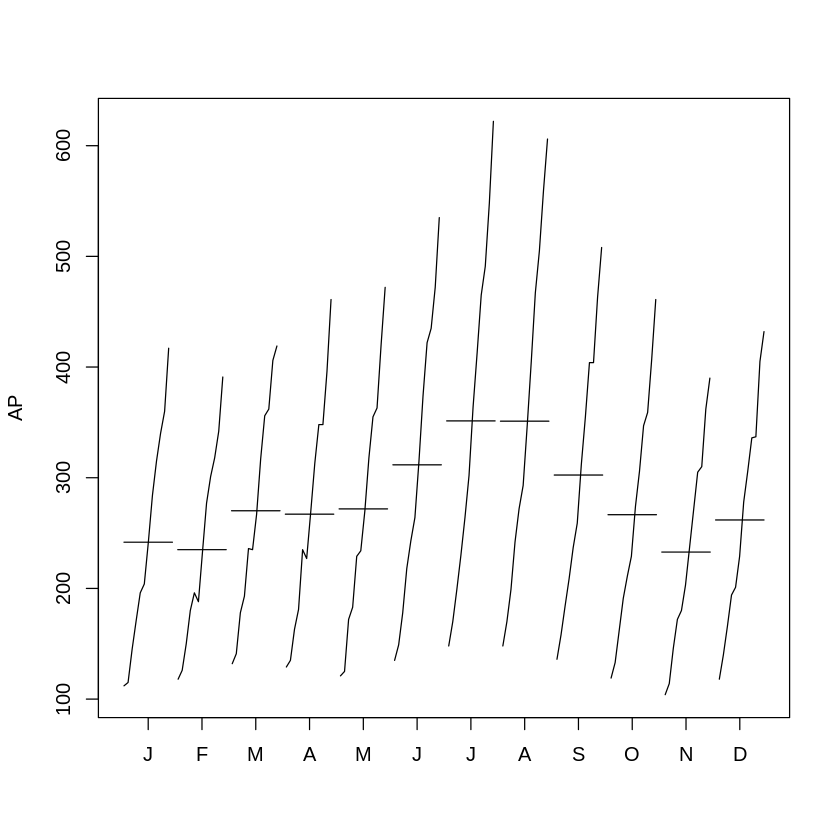

In [ ]:
# Here's also a monthplot,
# The data over the years is collected and plotted as a single series for each season (month)
monthplot(AP)
# Small shifts in ca. 1953 (year 3-4, ca. 1/3 of all years in the sample)
# for February, March and April, which are not observable for the other months

The monthplot summarizes data by plotting the mean value for each month over the years in your dataset. It displays how a particular month behaves across different years as a single time series, making it easier to see the average monthly pattern.
Each point on the plot corresponds to the average of that month over all the years. For example, it shows the average number of airline passengers in January across all the years from 1949 to 1960.
It may also display vertical lines that represent the variability (standard deviation) within each month.


Seasonality: You can easily identify if there are any months that consistently perform better or worse than others. For instance, months like July and August might show peaks due to summer travel, while months like January or February may show dips due to lower travel volumes.

Comparison of Months: You can compare the averages of each month to see how they differ across the year. If the time series is seasonal, you’ll notice clear patterns (e.g., higher passenger counts in summer months and lower counts in winter months).

Aggregated Monthly Patterns: Instead of looking at the data for each month across individual years, this plot aggregates the data and gives you the average behavior for each month over multiple years. This makes it easier to identify general trends.

Variability within Months: If the monthplot shows standard deviation lines, you can also assess how much variability there is in each month’s data across the years. Months with large variability will have longer vertical lines.
In summary, a monthplot helps you u

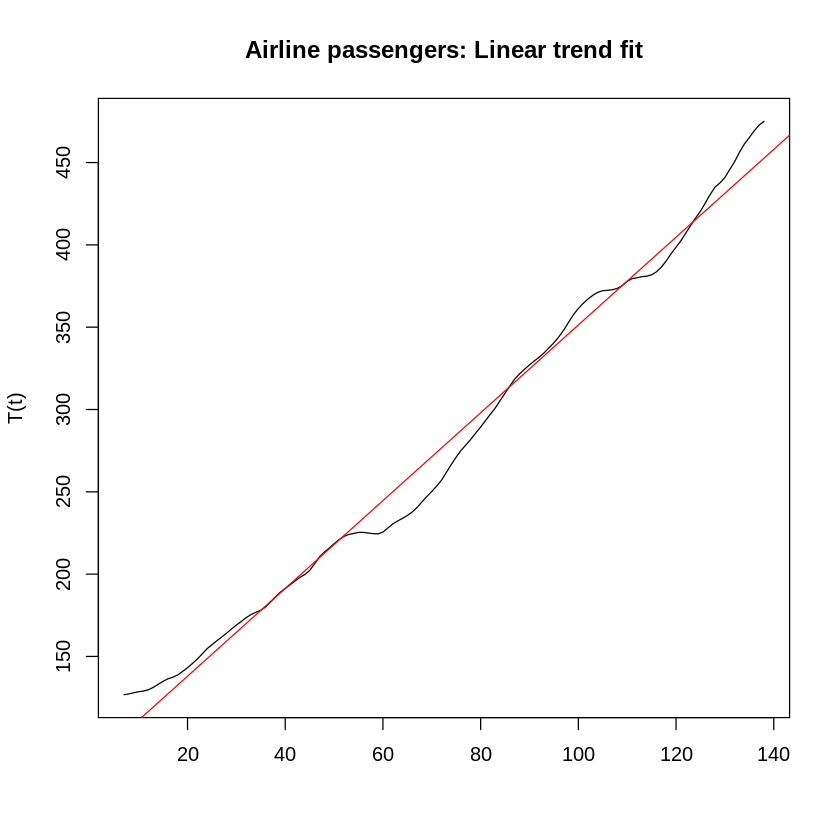

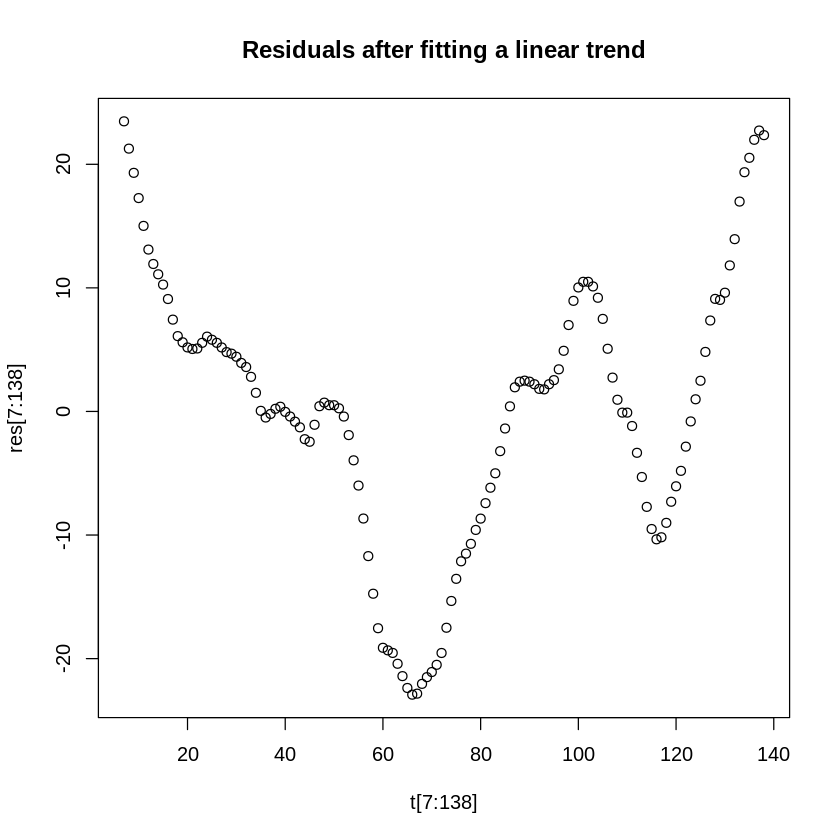

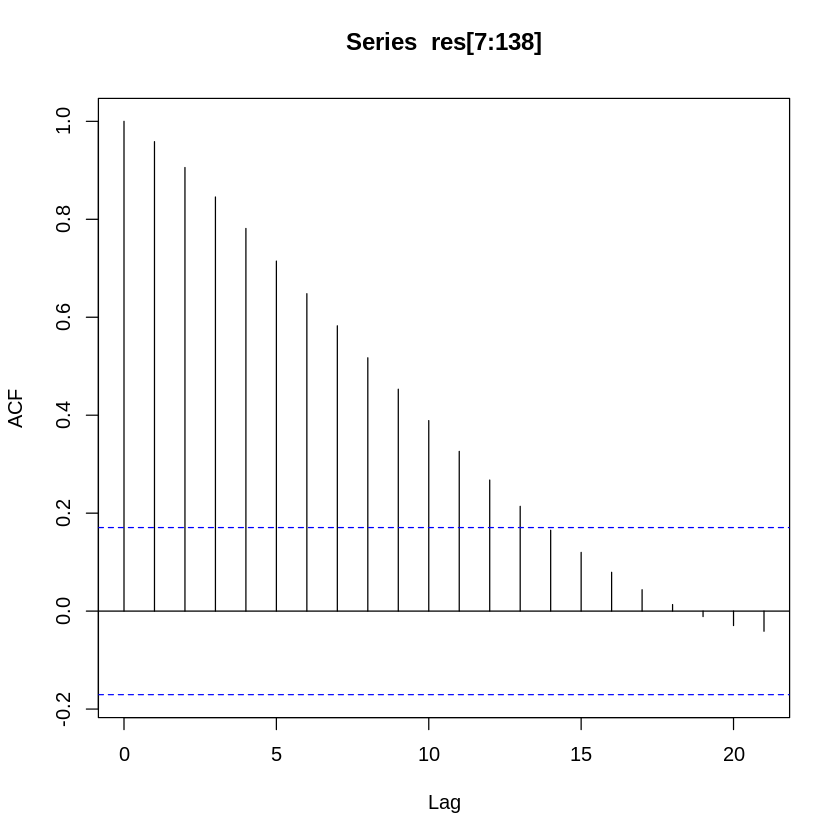

In [ ]:
# Fit a linear trend and inspect residuals to the Airlines data
t <- seq(1, 144, 1)
modelTrend <- lm(formula = AP.decompM$trend ~ t)
predT <- predict.lm(modelTrend, newdata = data.frame(t))

plot(AP.decompM$trend[7:138] ~ t[7:138], ylab="T(t)", xlab="",
     type="l", pch=20, main = "Airline passengers: Linear trend fit")
lines(predT, col="red")
res = AP.decompM$trend-predT
plot(res[7:138] ~ t[7:138], main="Residuals after fitting a linear trend")
# clear trending behaviour, high autocorrelation, also evident in the empirical ACF plot (correlogram)
acf(res[7:138])


This fits a linear model to the trend component of the multiplicative decomposition of the Airlines data and generates predicted values of the trend (predT) using the fitted linear model. The indices [7:138] are used to exclude the first and last few observations where the trend might not be fully estimated (due to moving average smoothing in the decomposition). The red line on the trend plot indicates the linear trend that was fitted to the data.

Residuals are calculated as the difference between the actual trend component and the predicted trend from the linear model. The residual plot indicates how much of the trend component is not explained by the linear trend.
This plot shows the residuals to visualize any patterns remaining after removing the linear trend.

The ACF plot shows the autocorrelation of the residuals.
If the residuals exhibit significant autocorrelation (i.e., non-zero values at lags in the ACF plot), this indicates that the data has patterns not fully captured by the linear trend. These patterns could be due to seasonality, cycles, or other non-linear trends.

the residuals are likely to show autocorrelation, suggesting that the linear trend alone is not enough, and you might need a more sophisticated model that can account for seasonality or cyclical behavior in the data.

**Serial Correlation Tests**


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 125.93, df = 10, p-value < 2.2e-16


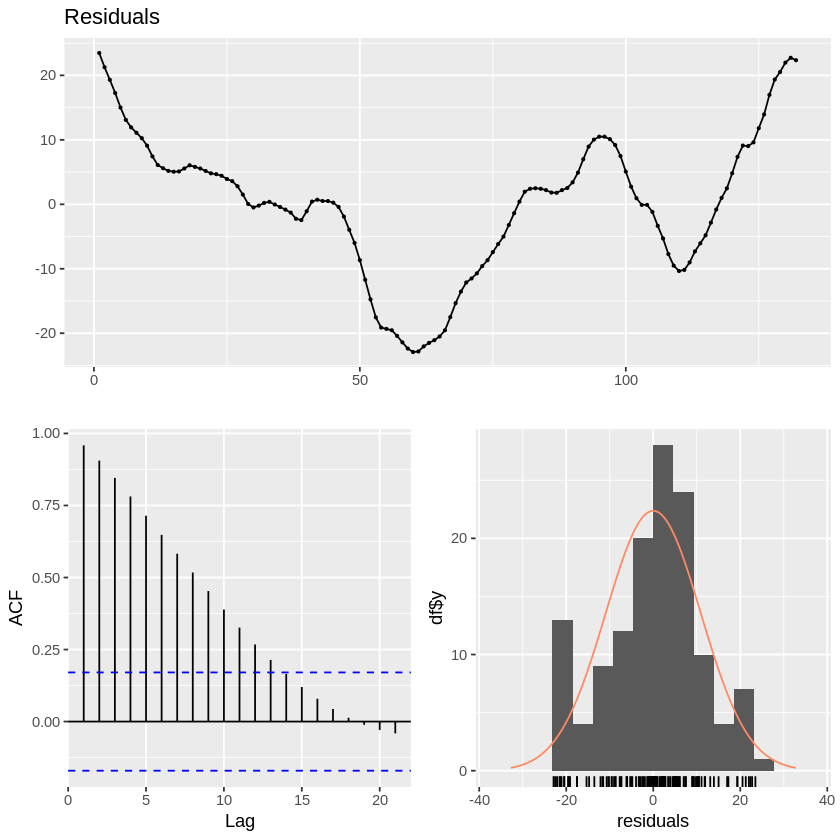

In [ ]:
# Breusch-Godfrey test for no serial correlation
checkresiduals(modelTrend) #from the forecast package, includes a histogram and ACF plot
# The checkresiduals() function will use the Breusch-Godfrey test for regression models, but the Ljung-Box test otherwise


In [ ]:

# Ljung-Box test in the stats package
Box.test(res[7:138], lag = 10, type = "Ljung-Box", fitdf = 1)
# again, strong rejection of the null hypothesis of independence at all lags up to lag 10


	Box-Ljung test

data:  res[7:138]
X-squared = 685.73, df = 9, p-value < 2.2e-16


In [ ]:
# Simulate some monthly data with a strong seasonal figure and a weak linear trend
t = seq(1,120,1)
sin1 = sin(2*pi*t/12)
cos1 = cos(2*pi*t/12)
b0 = 0.2
b1 = 0.01
a1 = 0.2
a2 = 0.5
u = rnorm(length(t), 0, 0.15)
y = b0 + b1*t + a1*sin1 + a2*cos1 + u

In [ ]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




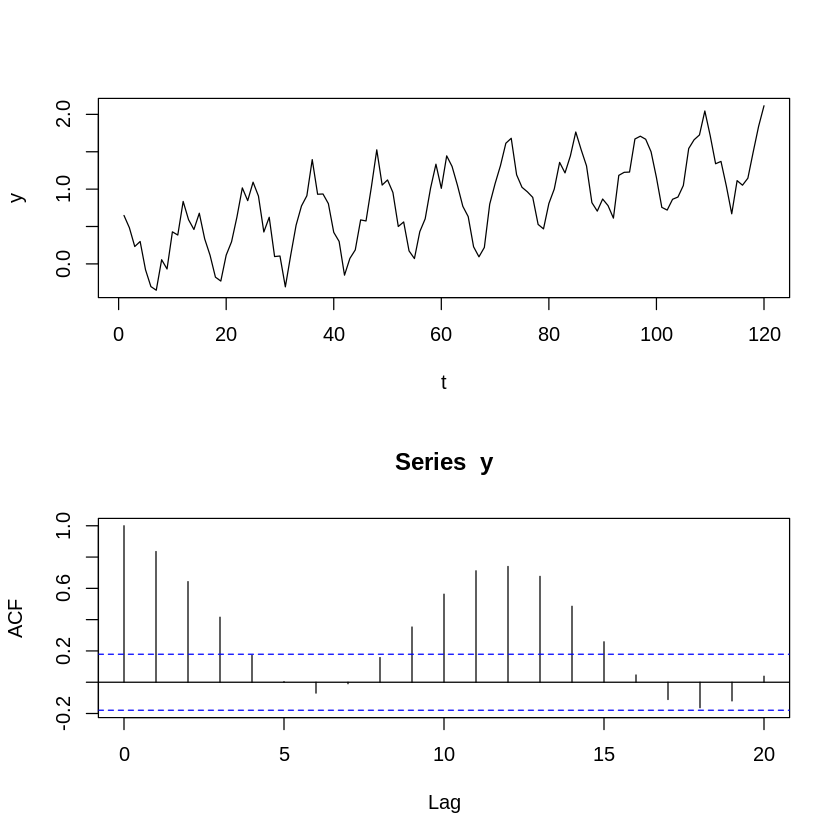

In [ ]:
par(mfrow = c(2, 1))
plot(y~t, type="l")
acf(y)
# Slow, almost linear decay in the ACF indicative of the strong trend component


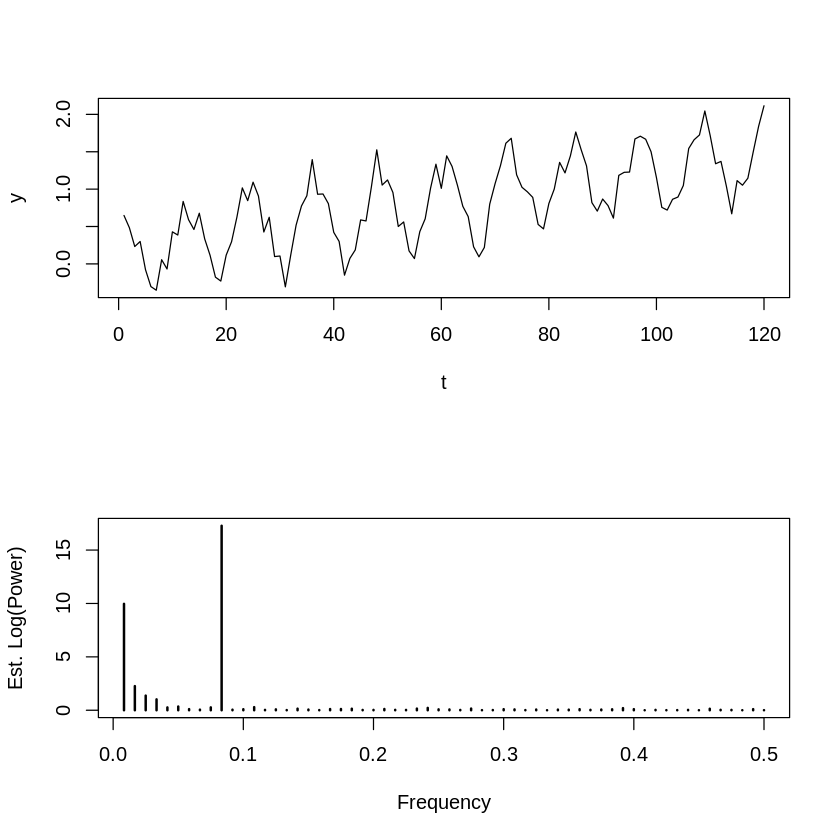

In [ ]:
# Unsmoothed periodogram with default settings
par(mfrow = c(2, 1))
plot(y~t, type="l")
yp1 = periodogram(y, log="yes", plot = TRUE, ylab="Est. Log(Power)")

In [ ]:
# Round up and sort frequencies and coefficients
y_spec = 100*round(yp1$spec, 5)
y_freq = as.numeric(format(round(yp1$freq, 5), nsmall = 5))
y_p = data.frame(freq = y_freq, c = y_spec)
y_p = y_p[order(y_p$c, decreasing=TRUE),]
y_p

,freq,c
,<dbl>,<dbl>
10,0.08333,1727.535
1,0.00833,996.425
2,0.01667,225.956
3,0.02500,137.019
4,0.03333,101.918
6,0.05000,34.912
13,0.10833,29.145
9,0.07500,26.864
5,0.04167,26.499


In [ ]:
# Most dominant frequency: the one with the highest estimated coefficient
freq1 = y_p$freq[y_p$c==max(y_p$c)]
# its corresponding period
per1 = 1/freq1
print("Dominant frequency and its corresponding period:")
freq1; per1

[1] "Dominant frequency and its corresponding period:"


[1] 0.08333

[1] 12.00048

In [ ]:
# Trend dominates the behaviour of the series;
# De-trend!

y_tr = lm(y~t)
y_detr = y - y_tr$coefficients[1] - y_tr$coefficients[2]*t

par(mfrow = c(2, 1))

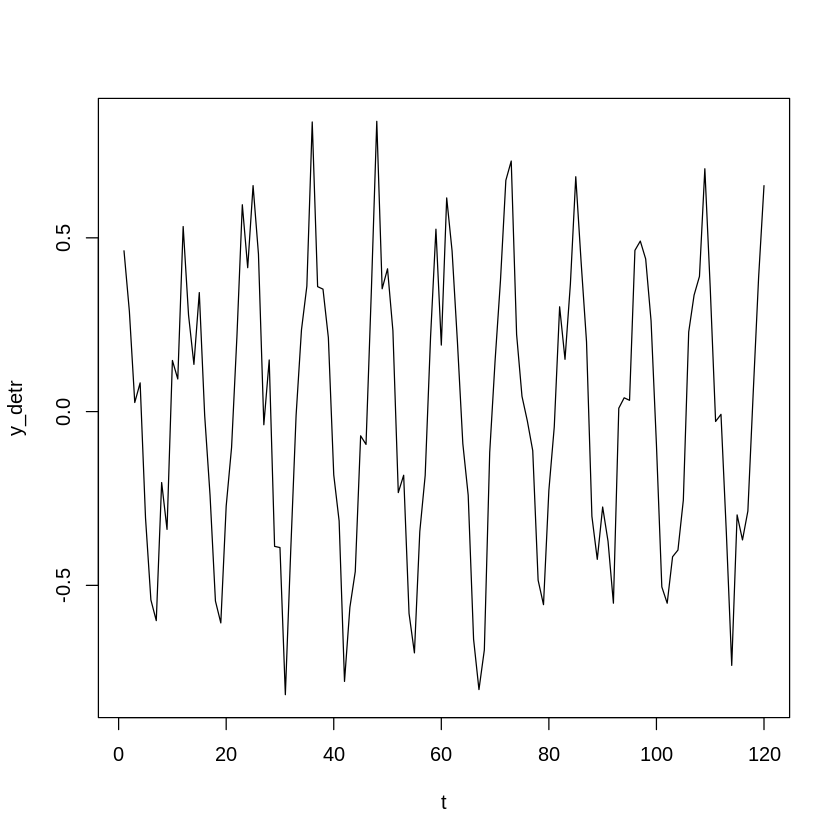

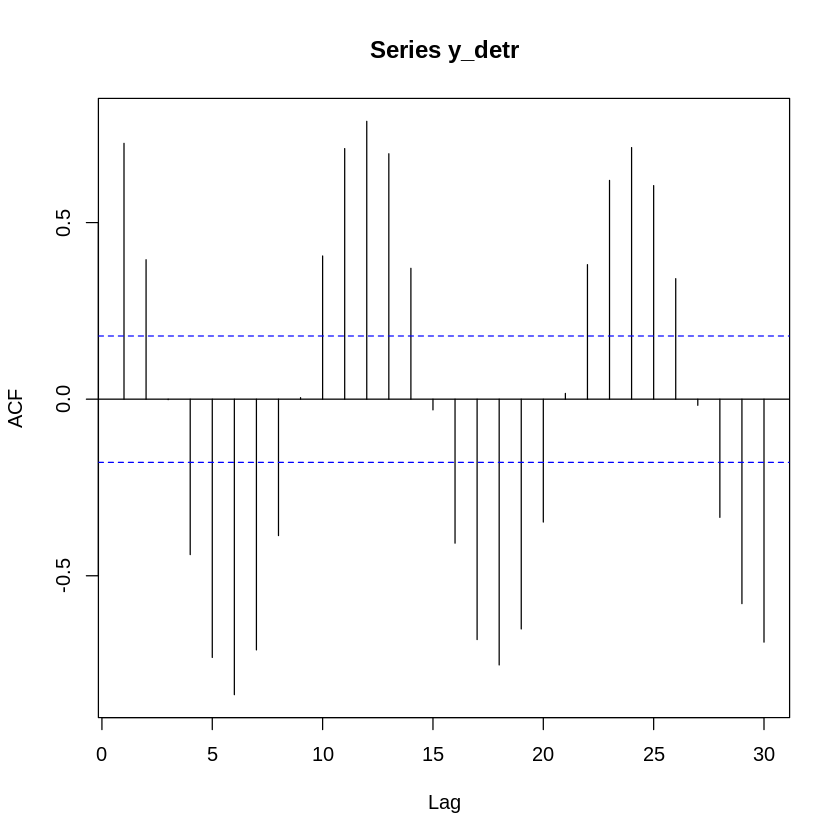

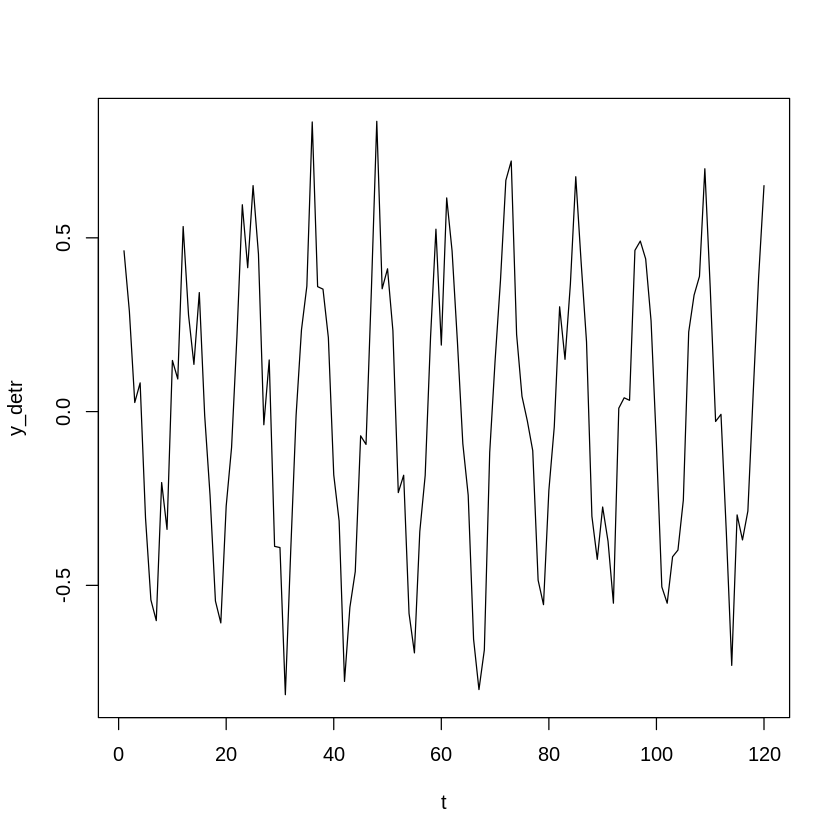

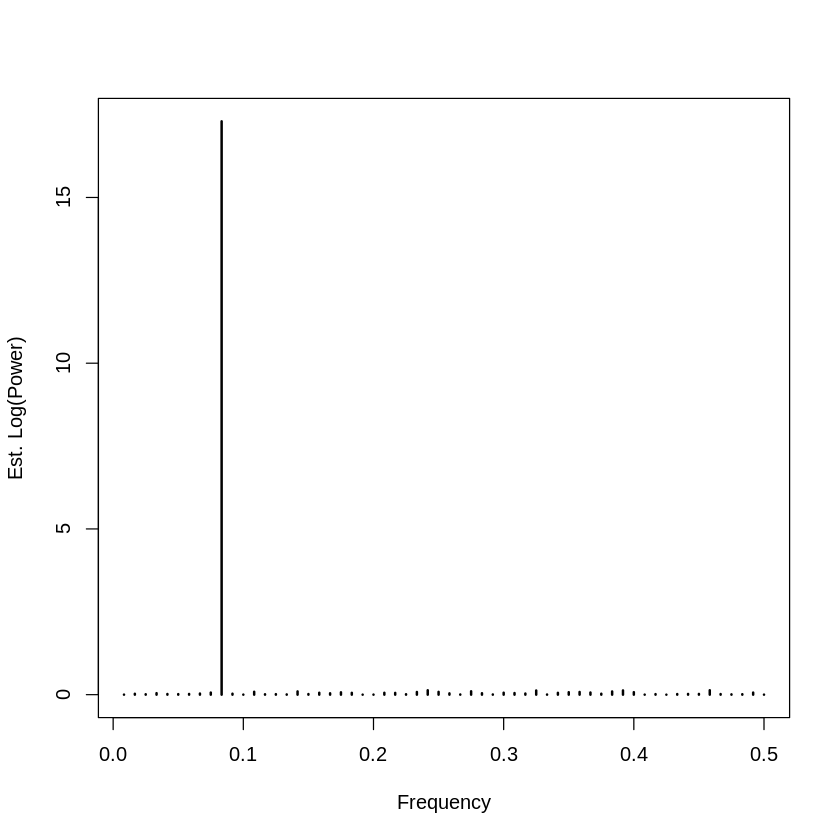

In [ ]:
# ACF
plot(y_detr~t, type="l")
acf(y_detr, lag.max=30)

# Periodogram 1
plot(y_detr~t, type="l")
yp1 = periodogram(y_detr, log="yes", plot = TRUE, ylab="Est. Log(Power)")




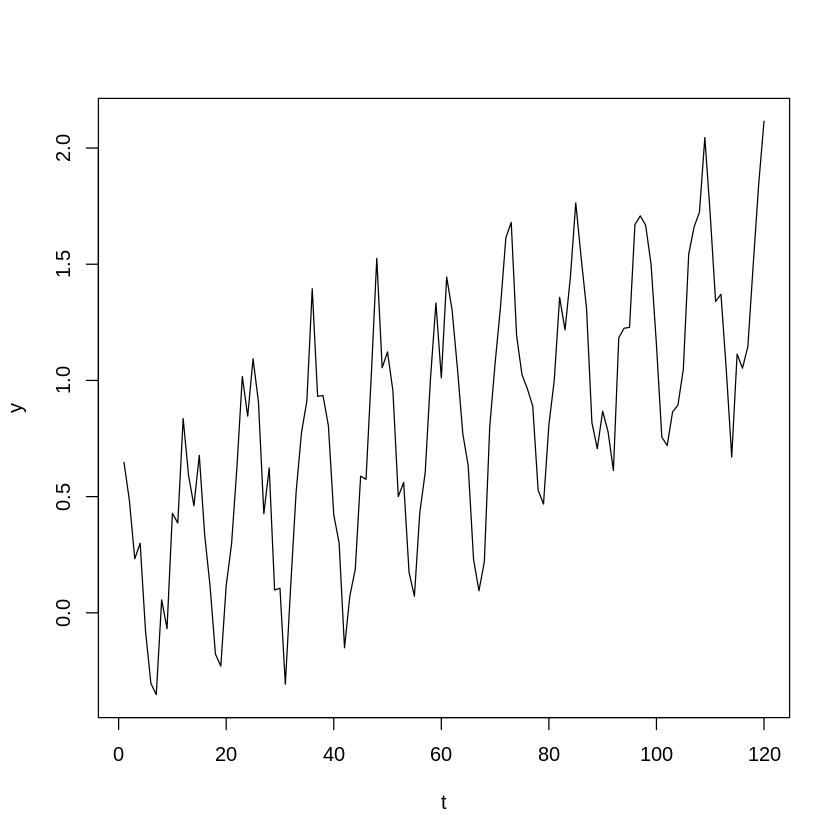

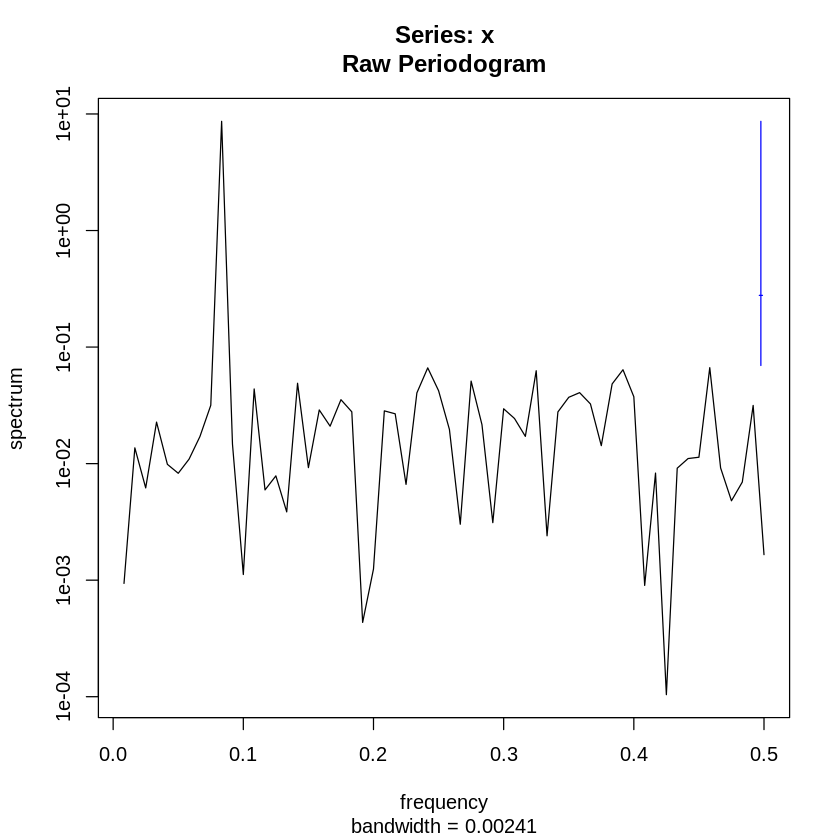

In [ ]:

# Periodogram 2
library(stats)
plot(y~t, type="l")
yp2 <- spectrum(y, plot = TRUE, taper = 0, demean = TRUE,
                           detrend = TRUE, fast = FALSE)


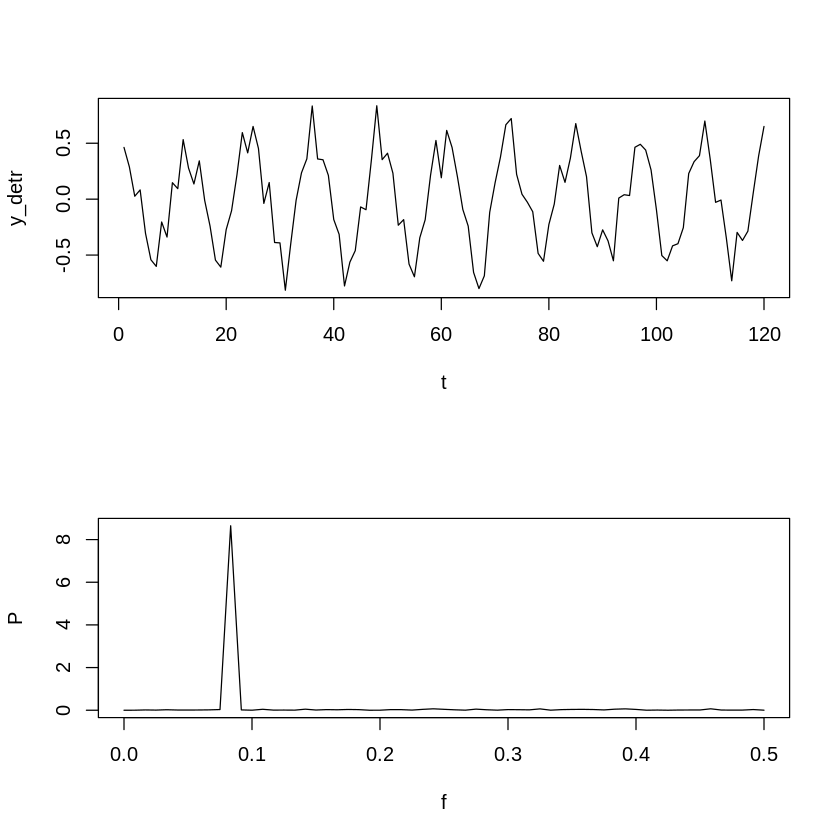

In [ ]:
# Periodogram 3
TT = length(y_detr)
T2  = floor(TT/2)
FFTy = abs(fft(y_detr)/sqrt(TT))^2 # Using the Fast Fourier Transform to compute the coefficients of the Discrete Fourier Transform of y
P = FFTy[1:(T2+1)] # Take only the first (T/2)+1 values of the FFT of y, since lambda in [0, 0.5].
f = (0:T2)/TT # A sequence of frequencies from 0 to .5 in steps of 1/T.

par(mfrow = c(2, 1))
plot(y_detr~t, type="l")
plot(f, P, type="l")
